In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/slice_data.csv')
df

,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y
0,20221201,부산70자1854,0,66443,22120105071500,0,193,0,129.158670,35.236021,0,-6.3,0.7
1,20221201,부산70자1854,0,66443,22120105071600,0,388,0,129.158670,35.236021,0,-7.9,1.6
2,20221201,부산70자1854,0,66443,22120105071700,0,777,0,129.158670,35.236021,0,-8.9,2.2
3,20221201,부산70자1854,0,66443,22120105071800,0,638,0,129.158670,35.236021,0,-6.6,0.8
4,20221201,부산70자1854,0,66443,22120105071900,0,461,0,129.158670,35.236021,0,-7.1,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948207,20221231,부산70자1894,176,3095705,22123121033800,0,331,0,129.158597,35.235956,66,-5.7,-1.2
5948208,20221231,부산70자1894,176,3095705,22123121033900,0,59,0,129.158597,35.235956,66,-5.8,-1.4
5948209,20221231,부산70자1894,176,3095705,22123121034000,0,0,0,129.158597,35.235956,66,-5.4,-1.0
5948210,20221231,부산70자1894,176,3095705,22123121034100,0,0,0,129.158597,35.235956,66,-5.4,-0.9


In [3]:
df['감속max'] = df['차량속도'].apply(lambda x: 7.64071e-10 * x ** 5 + -4.35372e-07 * x ** 4 + 9.68286e-05 * x ** 3 + -0.010472756 * x ** 2 + 0.548826407 * x + -0.103586171)
df['감속min'] = df['차량속도'].apply(lambda x: 9.278e-10 * x ** 5 + -4.92677e-07 * x ** 4 + 0.000101723 * x ** 3 + -0.010179457 * x ** 2 + 0.492711955 * x + -0.227038184)
df

,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y,감속max,감속min
0,20221201,부산70자1854,0,66443,22120105071500,0,193,0,129.158670,35.236021,0,-6.3,0.7,-0.103586,-0.227038
1,20221201,부산70자1854,0,66443,22120105071600,0,388,0,129.158670,35.236021,0,-7.9,1.6,-0.103586,-0.227038
2,20221201,부산70자1854,0,66443,22120105071700,0,777,0,129.158670,35.236021,0,-8.9,2.2,-0.103586,-0.227038
3,20221201,부산70자1854,0,66443,22120105071800,0,638,0,129.158670,35.236021,0,-6.6,0.8,-0.103586,-0.227038
4,20221201,부산70자1854,0,66443,22120105071900,0,461,0,129.158670,35.236021,0,-7.1,0.8,-0.103586,-0.227038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948207,20221231,부산70자1894,176,3095705,22123121033800,0,331,0,129.158597,35.235956,66,-5.7,-1.2,-0.103586,-0.227038
5948208,20221231,부산70자1894,176,3095705,22123121033900,0,59,0,129.158597,35.235956,66,-5.8,-1.4,-0.103586,-0.227038
5948209,20221231,부산70자1894,176,3095705,22123121034000,0,0,0,129.158597,35.235956,66,-5.4,-1.0,-0.103586,-0.227038
5948210,20221231,부산70자1894,176,3095705,22123121034100,0,0,0,129.158597,35.235956,66,-5.4,-0.9,-0.103586,-0.227038


In [4]:
df['감속max2'] = df['감속max'] * 2 - df['감속min']

In [5]:
l = []
for i in df.index:
    if i == 0:
        l.append(0)
        continue
    if df['브레이크'][i] == 1 and df['차량속도'][i] - df['차량속도'][i - 1] < 0:
        l.append(abs(df['차량속도'][i] - df['차량속도'][i - 1]))
    else:
        l.append(0)

In [6]:
df['감속'] = l

In [7]:
label = []
for i in df.index:
    if df['감속'][i] < df['감속min'][i]:
        label.append(0)
    elif df['감속min'][i] <= df['감속'][i] < df['감속max'][i]:
        label.append(1)
    elif df['감속max'][i] <= df['감속'][i] < df['감속max2'][i]:
        label.append(2)
    else:
        label.append(3)

In [8]:
df['위험운전감속'] = label
df

,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y,감속max,감속min,감속max2,감속,위험운전감속
0,20221201,부산70자1854,0,66443,22120105071500,0,193,0,129.158670,35.236021,0,-6.3,0.7,-0.103586,-0.227038,0.019866,0,2
1,20221201,부산70자1854,0,66443,22120105071600,0,388,0,129.158670,35.236021,0,-7.9,1.6,-0.103586,-0.227038,0.019866,0,2
2,20221201,부산70자1854,0,66443,22120105071700,0,777,0,129.158670,35.236021,0,-8.9,2.2,-0.103586,-0.227038,0.019866,0,2
3,20221201,부산70자1854,0,66443,22120105071800,0,638,0,129.158670,35.236021,0,-6.6,0.8,-0.103586,-0.227038,0.019866,0,2
4,20221201,부산70자1854,0,66443,22120105071900,0,461,0,129.158670,35.236021,0,-7.1,0.8,-0.103586,-0.227038,0.019866,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948207,20221231,부산70자1894,176,3095705,22123121033800,0,331,0,129.158597,35.235956,66,-5.7,-1.2,-0.103586,-0.227038,0.019866,0,2
5948208,20221231,부산70자1894,176,3095705,22123121033900,0,59,0,129.158597,35.235956,66,-5.8,-1.4,-0.103586,-0.227038,0.019866,0,2
5948209,20221231,부산70자1894,176,3095705,22123121034000,0,0,0,129.158597,35.235956,66,-5.4,-1.0,-0.103586,-0.227038,0.019866,0,2
5948210,20221231,부산70자1894,176,3095705,22123121034100,0,0,0,129.158597,35.235956,66,-5.4,-0.9,-0.103586,-0.227038,0.019866,0,2


In [9]:
df.query('번호판 != "부산70자1893"')

,날짜,번호판,일일주행거리,누적주행거리,정보발생일시,차량속도,RPM,브레이크,GPS_X,GPS_Y,방위각,가속도_X,가속도_Y,감속max,감속min,감속max2,감속,위험운전감속
0,20221201,부산70자1854,0,66443,22120105071500,0,193,0,129.158670,35.236021,0,-6.3,0.7,-0.103586,-0.227038,0.019866,0,2
1,20221201,부산70자1854,0,66443,22120105071600,0,388,0,129.158670,35.236021,0,-7.9,1.6,-0.103586,-0.227038,0.019866,0,2
2,20221201,부산70자1854,0,66443,22120105071700,0,777,0,129.158670,35.236021,0,-8.9,2.2,-0.103586,-0.227038,0.019866,0,2
3,20221201,부산70자1854,0,66443,22120105071800,0,638,0,129.158670,35.236021,0,-6.6,0.8,-0.103586,-0.227038,0.019866,0,2
4,20221201,부산70자1854,0,66443,22120105071900,0,461,0,129.158670,35.236021,0,-7.1,0.8,-0.103586,-0.227038,0.019866,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5948207,20221231,부산70자1894,176,3095705,22123121033800,0,331,0,129.158597,35.235956,66,-5.7,-1.2,-0.103586,-0.227038,0.019866,0,2
5948208,20221231,부산70자1894,176,3095705,22123121033900,0,59,0,129.158597,35.235956,66,-5.8,-1.4,-0.103586,-0.227038,0.019866,0,2
5948209,20221231,부산70자1894,176,3095705,22123121034000,0,0,0,129.158597,35.235956,66,-5.4,-1.0,-0.103586,-0.227038,0.019866,0,2
5948210,20221231,부산70자1894,176,3095705,22123121034100,0,0,0,129.158597,35.235956,66,-5.4,-0.9,-0.103586,-0.227038,0.019866,0,2


In [10]:
df.to_csv('../data/0607_감속분류.csv', index=False)

In [11]:
velocity = [i for i in range(60)]

In [12]:
temp = pd.DataFrame({'속도': velocity})

In [13]:
temp['ymax'] = temp['속도'].apply(lambda x: 7.64071e-10 * x ** 5 + -4.35372e-07 * x ** 4 + 9.68286e-05 * x ** 3 + -0.010472756 * x ** 2 + 0.548826407 * x + -0.103586171)
temp['ymin'] = temp['속도'].apply(lambda x: 9.278e-10 * x ** 5 + -4.92677e-07 * x ** 4 + 0.000101723 * x ** 3 + -0.010179457 * x ** 2 + 0.492711955 * x + -0.227038184)

In [14]:
temp['ymax2'] = temp['ymax'] * 2 - temp['ymin']
temp

,속도,ymax,ymin,ymax2
0,0,-0.103586,-0.227038,0.019866
1,1,0.434864,0.255596,0.614132
2,2,0.952943,0.718474,1.187413
3,3,1.451218,1.162189,1.740246
4,4,1.930242,1.587323,2.273160
5,5,2.390561,1.994446,2.786676
6,6,2.832710,2.384114,3.281305
7,7,3.257213,2.756876,3.757551
8,8,3.664587,3.113267,4.215907
9,9,4.055335,3.453812,4.656858


In [15]:
d = df.query('감속 > 0')

In [16]:
import matplotlib.pyplot as plt

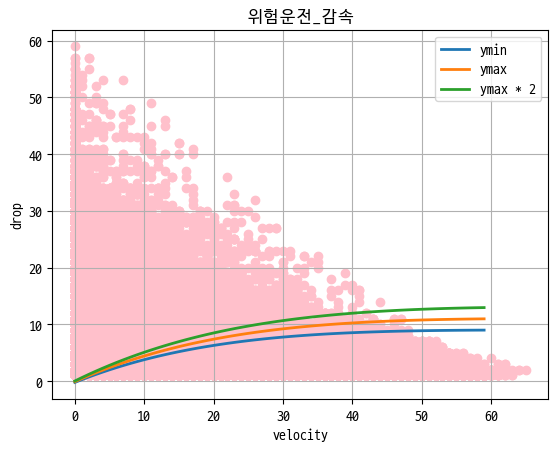

In [18]:
plt.rc('font', family='D2Coding')
plt.title('위험운전_감속')

plt.plot(temp['속도'], temp['ymin'], linewidth=2)
plt.plot(temp['속도'], temp['ymax'], linewidth=2)
plt.plot(temp['속도'], temp['ymax2'], linewidth=2)
plt.xlabel('velocity')
plt.ylabel('drop')
plt.scatter(d['차량속도'], d['감속'], color='pink')
plt.grid(True)
plt.legend({'ymin': temp['ymin'], 'ymax': temp['ymax'], 'ymax * 2': temp['ymax2']})
plt.show()